In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
from openretina.misc import print_h5_structure

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
lara_data_path = "/gpfs01/euler/data/SharedFiles/projects/TP12/2024-03-22_neuron_data_stim_c285329_responses_483c12d.h5"
new_export_path = "/gpfs01/euler/data/SharedFiles/projects/TP12/2024-03-25_neuron_data_responses_484c12d_djimaging.h5"

In [3]:
print_h5_structure(new_export_path)

{'session_1_ventral1_20200226': {'__attributes__': {'date': '2020-02-26',
                                                    'exp_num': 1,
                                                    'experimenter': 'Szatko',
                                                    'eye': 'left',
                                                    'field': 'GCL0',
                                                    'scan_sequence_idx': 18},
                                 'chirp_raw_traces': 'h5.Dataset(shape=(131, '
                                                     '1501)), float32',
                                 'chirp_smoothed_traces': 'h5.Dataset(shape=(131, '
                                                          '1501)), float32',
                                 'chirp_spike_times': 'h5.Dataset(shape=(131, '
                                                      '1501)), float32',
                                 'chirp_spikes': 'h5.Dataset(shape=(131, '
                            

In [4]:
from openretina.h5_handling import load_h5_into_dict

old_data = load_h5_into_dict(lara_data_path)

new_data = load_h5_into_dict(new_export_path)

Loading HDF5 file contents:   0%|          | 0/1080 [00:00<?, ?item/s]

Loading HDF5 file contents:   0%|          | 0/1340 [00:00<?, ?item/s]

In [5]:
example_field = "session_1_ventral1_20200226"

In [6]:
old_data[example_field].keys()

dict_keys(['chirp_raw_traces', '__attributes__', 'chirp_smoothed_traces', 'chirp_traces_times', 'group_assignment', 'group_confidences', 'mb_raw_traces', 'mb_smoothed_traces', 'mb_traces_times', 'natural_inferred_spikes', 'natural_raw_traces', 'natural_smoothed_traces', 'natural_traces_times', 'responses_final', 'roi_coords', 'roi_ids'])

In [7]:
new_data[example_field].keys()

dict_keys(['chirp_raw_traces', '__attributes__', 'chirp_smoothed_traces', 'chirp_spike_times', 'chirp_spikes', 'chirp_traces_times', 'group_assignment', 'group_confidences', 'mb_raw_traces', 'mb_smoothed_traces', 'mb_spike_times', 'mb_spikes', 'mb_traces_times', 'natural_raw_traces', 'natural_smoothed_traces', 'natural_spike_times', 'natural_spikes', 'natural_traces_times', 'responses_final', 'roi_coords', 'roi_ids'])

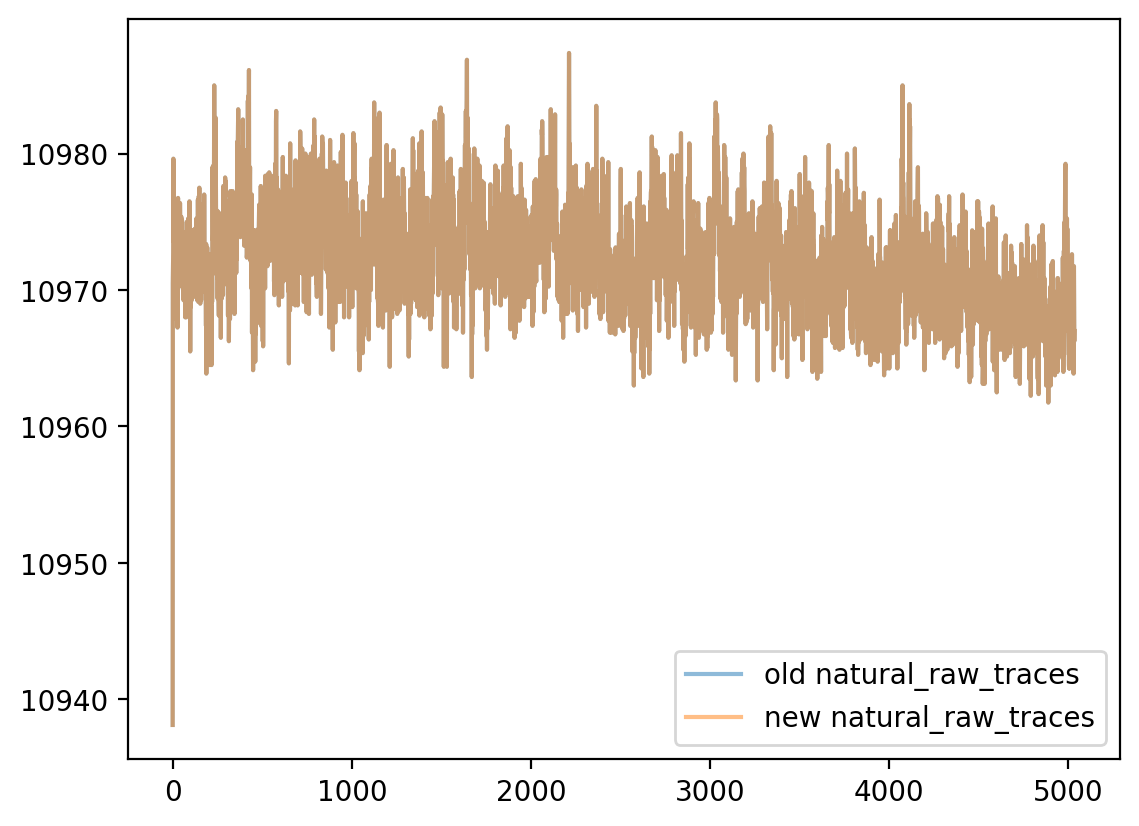

In [8]:
trace_type = "natural_raw_traces"
neuron_id = 0
old_data_example = old_data[example_field][trace_type][neuron_id]
new_data_example = new_data[example_field][trace_type][neuron_id]

plt.plot(old_data_example, label=f"old {trace_type}", alpha=0.5)
plt.plot(new_data_example, label=f"new {trace_type}", alpha=0.5)
plt.legend()

(0.0, 500.0)

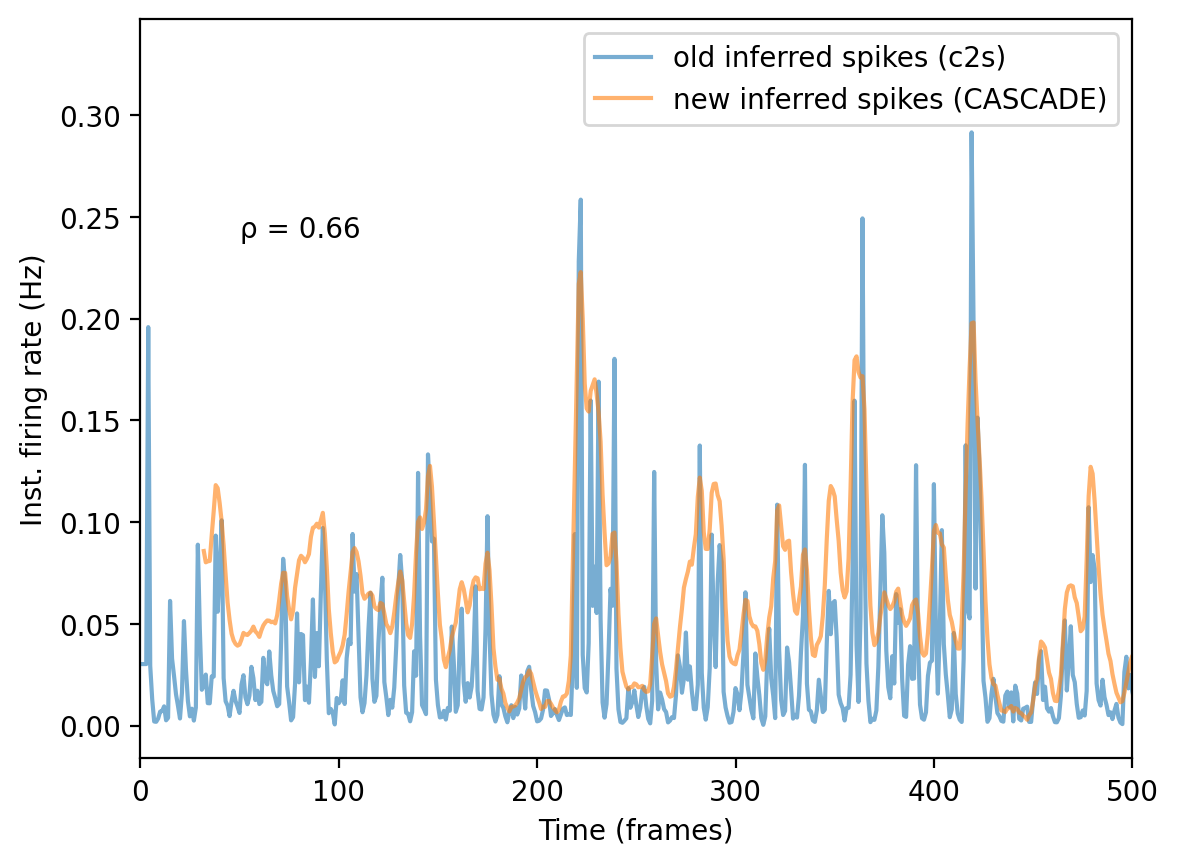

In [9]:
example_field = "session_1_ventral1_20200226"
neuron_id = 0
old_spikes_example = old_data[example_field]["natural_inferred_spikes"][neuron_id]
new_spikes_example = new_data[example_field]["natural_spikes"][neuron_id]

plt.plot(old_spikes_example, label=f"old inferred spikes (c2s)", alpha=0.6)
plt.plot(
    new_spikes_example * (1 / 7.8125), label=f"new inferred spikes (CASCADE)", alpha=0.6
)
plt.annotate(
    f"ρ = {np.corrcoef(old_spikes_example[50:-50], new_spikes_example[50:-50])[0, 1]:.2f}",
    (50, 0.24),
)
plt.xlabel("Time (frames)")
plt.ylabel("Inst. firing rate (Hz)")
plt.legend()
plt.xlim(0, 500)

In [15]:
old_spikes_integral = np.cumsum(old_spikes_example)
new_spikes_integral = np.cumsum(
    new_spikes_example[~np.isnan(new_spikes_example)] * (1 / 7.8125)
)

In [16]:
old_spikes_integral[-1]

152.73514

In [17]:
new_spikes_integral[-1]

343.54684